In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import window, count, date_format
import matplotlib.pyplot as plt
import pandas as pd

# Kreiranje Spark sesije
spark = SparkSession.builder \
    .appName("StreamingDataAnalysis") \
    .getOrCreate()

# Učitavanje podataka kao streaming DataFrame iz CSV datoteke
csv_path = "dbfs:/FileStore/intraday"
schema = "timestamp TIMESTAMP, open FLOAT, high FLOAT, low FLOAT, close FLOAT, volume INT"
streamingInputDF = (
    spark
    .readStream
    .schema(schema)               # Postavljanje šeme CSV podataka
    .option("header", "true")     # Uključivanje hedera u prvom redu CSV datoteke
    .csv(csv_path)
)

streamingCountsDF = streamingInputDF.groupBy(window(streamingInputDF.timestamp, "15 minutes")).agg(avg("close").alias("avg_close"), avg("volume").alias("avg_volume"))

# Da li je ovaj DataFrame zapravo streaming DataFrame?
streamingCountsDF.isStreaming

# streamingCountsDF.printSchema()

# Podešavanje broja particija za shuffle operacije
spark.conf.set("spark.sql.shuffle.partitions", "2")

# Upisivanje streaming podataka u "memory" kao in-memory tabelu
query = (
    streamingCountsDF
    .writeStream
    .format("memory")        # memory = čuvanje tabele u memoriji
    .queryName("statistics")     # statistics = ime in-memory tabele
    .outputMode("complete") 
    .start() # Navedite putanju direktno ovde kao argument funkcije start()
)



In [0]:
%sql
SELECT window.start AS start_time, window.end AS end_time, avg_close, avg_volume
FROM statistics
ORDER BY window.start DESC

start_time,end_time,avg_close,avg_volume
2024-02-02T19:45:00.000+0000,2024-02-02T20:00:00.000+0000,185.56999715169272,29.333333333333332
2024-02-02T19:30:00.000+0000,2024-02-02T19:45:00.000+0000,185.7699966430664,5.5
2024-02-02T19:15:00.000+0000,2024-02-02T19:30:00.000+0000,185.77666219075522,346.6666666666667
2024-02-02T19:00:00.000+0000,2024-02-02T19:15:00.000+0000,185.7899932861328,706793.0
2024-02-02T18:45:00.000+0000,2024-02-02T19:00:00.000+0000,185.78666178385416,182.66666666666666
2024-02-02T18:30:00.000+0000,2024-02-02T18:45:00.000+0000,185.73966471354166,235600.0
2024-02-02T18:15:00.000+0000,2024-02-02T18:30:00.000+0000,185.6586659749349,11.333333333333334
2024-02-02T18:00:00.000+0000,2024-02-02T18:15:00.000+0000,185.60000610351562,1.0
2024-02-02T17:45:00.000+0000,2024-02-02T18:00:00.000+0000,185.68999735514322,22.333333333333332
2024-02-02T17:30:00.000+0000,2024-02-02T17:45:00.000+0000,185.63500213623047,19.5


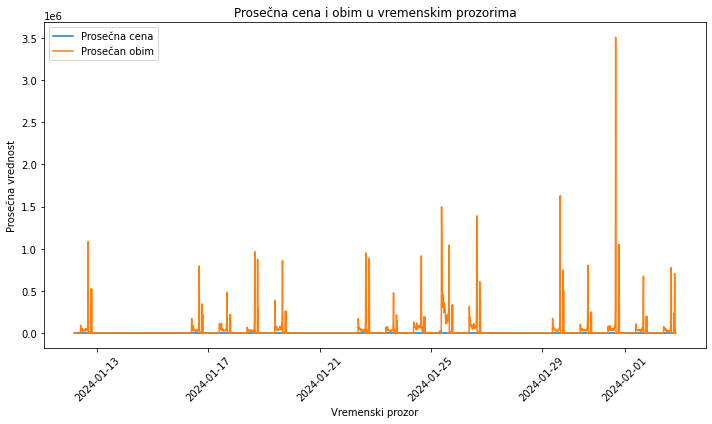

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import window, avg
import pandas as pd
import matplotlib.pyplot as plt

result_df = spark.sql("""
    SELECT window.start AS start_time, window.end AS end_time, avg_close, avg_volume
    FROM statistics
    ORDER BY window.start
""").toPandas()

# Konvertovanje kolona sa vremenskim prozorima u datetime
result_df['start_time'] = pd.to_datetime(result_df['start_time'])
result_df['end_time'] = pd.to_datetime(result_df['end_time'])

# Priprema podataka za grafikon
x = result_df['start_time']
y1 = result_df['avg_close']
y2 = result_df['avg_volume']

# Vizualizacija podataka
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Prosečna cena')
plt.plot(x, y2, label='Prosečan obim')
plt.title('Prosečna cena i obim u vremenskim prozorima')
plt.xlabel('Vremenski prozor')
plt.ylabel('Prosečna vrednost')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafikona
plt.show()

Ovde mozemo videti da je prosecni obim trgovine bio najveci 01.02.2024 